In [1]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import torch

In [ ]:
import os
import sys
sys.path.append(os.path.realpath(".."))
dg = pickle.load(open('../data/datafile_dose_exp_test.pkl', 'rb'))

In [3]:

t0 = 5

x = dg.measurements[t0:]
m = dg.masks[t0:]

mean = x.sum() / m.sum()
mean
f2 = torch.mean(torch.sum((x - mean) ** 2 * m, dim=(0, 2)) / torch.sum(m, dim=(0, 2)))


t0 = 10

x = dg.measurements[t0:]
m = dg.masks[t0:]

mean = x.sum() / m.sum()
mean
f5 = torch.mean(torch.sum((x - mean) ** 2 * m, dim=(0, 2)) / torch.sum(m, dim=(0, 2))) / f2

t0 = 12

x = dg.measurements[t0:]
m = dg.masks[t0:]

mean = x.sum() / m.sum()
mean
f10 = torch.mean(torch.sum((x - mean) ** 2 * m, dim=(0, 2)) / torch.sum(m, dim=(0, 2))) / f2


In [4]:
t0 = 5

if t0 == 5:
    t = ''
else:
    t = '_' + str(t0)

## sample

In [8]:
def get_sample(t0=2):

    if t0 == 5:
        t = ''
    else:
        t = '_' + str(t0)
    df = pd.read_csv('../results/results_sample{}.txt'.format(t), header = None)

    df_rmse = df[df[2] == 'rmse_x']
    df_cprs = df[df[2] == 'cprs_x']

    df_rmseh = df[df[2] == 'rmse_z0']
    df_cprsh = df[df[2] == 'cprs_z0']

    return df_rmse, df_cprs
    

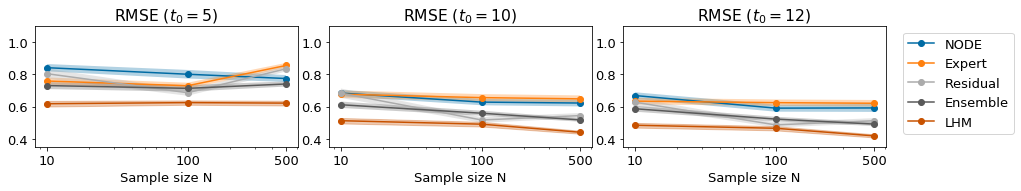

In [11]:
f=3
model_dict = {
    'neural': 'NODE',
    'expert': 'Expert',
    'residual': 'Residual',
    'ensemble2': 'Ensemble',
    'hybrid': 'LHM'
}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(14,2.5))
plt.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = '13'

# RMSE-X-Sample
plt.subplot(131)

df_rmse, df_cprs = get_sample(5)

for n in model_dict.keys():
    dfs = df_rmse[df_rmse[0] == n]
    if n == 'hybrid':
        plt.fill_between(dfs[1] - 300, dfs[3] - f * dfs[4], dfs[3] + f * dfs[4], alpha=0.3, color=colors[5])
        plt.plot(dfs[1] - 300, dfs[3], 'o-', label=model_dict[n], color=colors[5])
    else:
        plt.fill_between(dfs[1] - 300, dfs[3] - f * dfs[4], dfs[3] + f * dfs[4], alpha=0.3)
        plt.plot(dfs[1] - 300, dfs[3], 'o-', label=model_dict[n])
        
plt.title(r'RMSE ($t_0=5$)')
plt.xscale('log')
plt.ylim(0.35, 1.1)
ax = plt.gca()
ax.set_xticks([10,100,500])
ax.set_xticklabels([10,100,500])
plt.xlabel('Sample size N')


# RMSE-X-Sample
plt.subplot(132)

df_rmse, df_cprs  = get_sample(10)

for n in model_dict.keys():
    dfs = df_rmse[df_rmse[0] == n]
    if n == 'hybrid':
        plt.fill_between(dfs[1] - 300, dfs[3] / f5 - f * dfs[4] / f5, dfs[3] / f5 + f * dfs[4] / f5, alpha=0.3, color=colors[5])
        plt.plot(dfs[1] - 300, dfs[3] / f5, 'o-', label=model_dict[n], color=colors[5])
    else:
        plt.fill_between(dfs[1] - 300, dfs[3] / f5 - f * dfs[4] / f5, dfs[3] / f5 + f * dfs[4] / f5, alpha=0.3)
        plt.plot(dfs[1] - 300, dfs[3] / f5, 'o-', label=model_dict[n])
        
plt.title(r'RMSE ($t_0=10$)')
plt.xscale('log')
plt.ylim(0.35, 1.1)
ax = plt.gca()
ax.set_xticks([10,100,500])
ax.set_xticklabels([10,100,500])
plt.xlabel('Sample size N')


# RMSE-X-Sample
plt.subplot(133)

df_rmse, df_cprs  = get_sample(12)

for n in model_dict.keys():
    dfs = df_rmse[df_rmse[0] == n]
    if n == 'hybrid':
        plt.fill_between(dfs[1] - 300, (dfs[3] - f * dfs[4])/ f10, (dfs[3] + f * dfs[4])/ f10, alpha=0.3, color=colors[5])
        plt.plot(dfs[1] - 300, dfs[3]/ f10, 'o-', label=model_dict[n], color=colors[5])
    else:
        plt.fill_between(dfs[1] - 300, (dfs[3] - f * dfs[4])/ f10, (dfs[3] + f * dfs[4])/ f10, alpha=0.3)
        plt.plot(dfs[1] - 300, dfs[3]/ f10, 'o-', label=model_dict[n])
        
plt.title(r'RMSE ($t_0=12$)')
plt.xscale('log')
plt.ylim(0.35, 1.1)
ax = plt.gca()
ax.set_xticks([10,100,500])
ax.set_xticklabels([10,100,500])
plt.xlabel('Sample size N')


plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout(pad=0.1)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)

plt.savefig(fname='Fig6.png', dpi=300)